### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-21/04/20
#### Clasificacion de imagenes motoras en EEG con CNN-1D
##### Caracteristicas = RWE-DWT
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 56.60%
##### Kappa = 0.4213

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 3))
x_test = x_test.reshape((n_samples_test, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3)
(288, 22, 3)


In [11]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


In [0]:
def CNN_1D():
  model = Sequential()
  model.add(Conv1D(32, 3, activation='relu', padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Flatten())
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
loss:  1.2423820429378085
accuracy:  0.5069444179534912
kappa:  0.34259259259259256
confusion matrix:
 [[37 23  6  6]
 [24 38  9  1]
 [11  1 31 29]
 [ 8  2 22 40]]


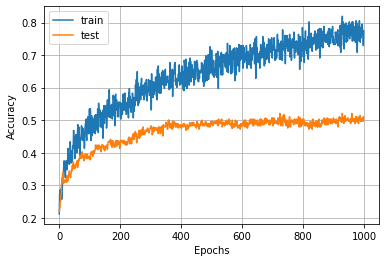

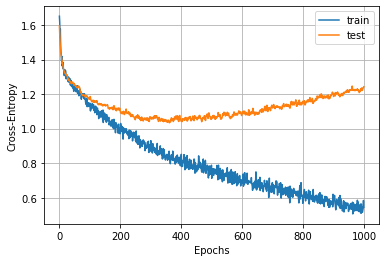

Iteration: 2
loss:  1.2526298099093967
accuracy:  0.5208333134651184
kappa:  0.36111111111111116
confusion matrix:
 [[37 24  4  7]
 [21 42  7  2]
 [ 9  1 42 20]
 [ 7  3 33 29]]


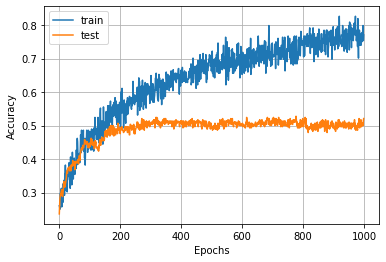

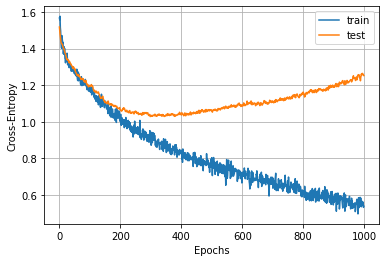

Iteration: 3
loss:  1.0887078245480855
accuracy:  0.53125
kappa:  0.375
confusion matrix:
 [[40 19  4  9]
 [25 39  7  1]
 [ 8  0 45 19]
 [11  0 32 29]]


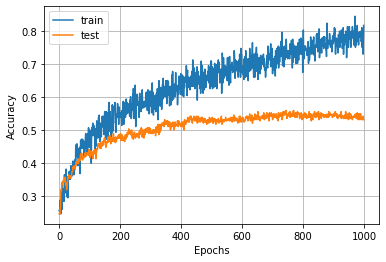

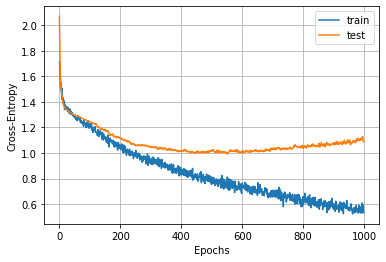

Iteration: 4
loss:  1.2079894145329793
accuracy:  0.5069444179534912
kappa:  0.34259259259259256
confusion matrix:
 [[40 23  4  5]
 [20 42  7  3]
 [14  1 32 25]
 [11  1 28 32]]


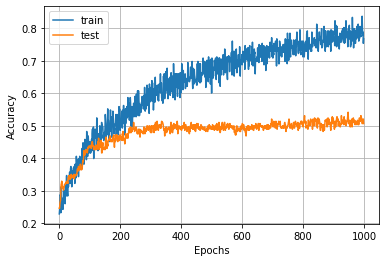

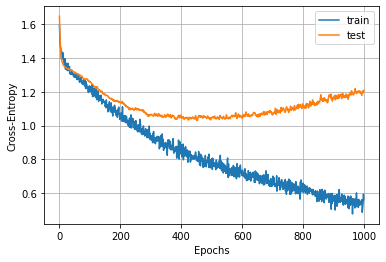

Iteration: 5
loss:  1.1882649328973558
accuracy:  0.5590277910232544
kappa:  0.4120370370370371
confusion matrix:
 [[40 19  6  7]
 [19 46  6  1]
 [ 9  1 34 28]
 [12  1 18 41]]


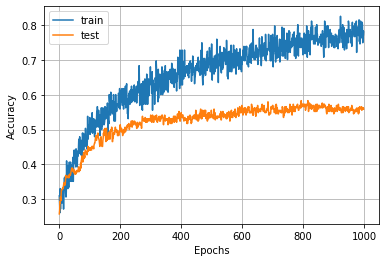

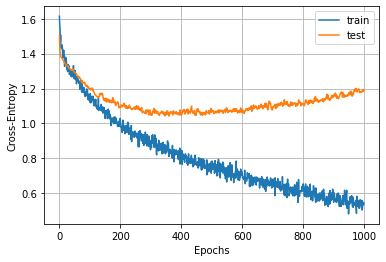


Resultados:
loss: [1.2423820429378085, 1.2526298099093967, 1.0887078245480855, 1.2079894145329793, 1.1882649328973558]
accuracy: [0.5069444179534912, 0.5208333134651184, 0.53125, 0.5069444179534912, 0.5590277910232544]
kappa: [0.34259259259259256, 0.36111111111111116, 0.375, 0.34259259259259256, 0.4120370370370371]


In [16]:
array_loss = []
array_acc = []
array_kappa = []
for i in range(5):
  print("Iteration:", i+1)
    
  model = CNN_1D()

  history = model.fit(x_train, y_train, epochs=1000, batch_size=18,
                      validation_data=(x_test, y_test), verbose=0)
                      # callbacks=[mc]
    
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
  array_loss.append(test_loss)
  print("loss: ", test_loss)
  array_acc.append(test_acc)
  print("accuracy: ", test_acc)
    
  probabilidades = model.predict(x_test)
  y_pred = np.argmax(probabilidades, 1) #1=fila
    
  kappa = cohen_kappa_score(y_test, y_pred)
  array_kappa.append(kappa)
  print("kappa: ", kappa)
    
  matriz_confusion = confusion_matrix(y_test, y_pred)
  print("confusion matrix:\n", matriz_confusion)
    
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'])
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Cross-Entropy')
  plt.legend(['train', 'test'])
  plt.show()
    
print() 
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)

In [17]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 3, 32)             2144      
_________________________________________________________________
flatten_10 (Flatten)         (None, 96)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1552      
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 68        
Total params: 3,764
Trainable params: 3,764
Non-trainable params: 0
_________________________________________________________________


In [18]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("std: (+/- %.4f)" % np.std(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("std: (+/- %.4f)" % np.std(array_kappa))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))

Mean Accuracy: 0.5250
std: (+/- 0.0193)
Mean Kappa: 0.3667
std: (+/- 0.0258)
Max Accuracy: 0.5590
Max Kappa: 0.4120
